<a href="https://colab.research.google.com/github/harshita042/PRML-CSL2050/blob/main/LogReg_Lab_4final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this lab, you will implement logistic regression from scratch, understand evaluation metrics through Precision-Recall and ROC curves, and extend the algorithm to handle multi-class classification problems.


# Logistic Regression: Mathematical Foundations

Logistic regression is a supervised learning algorithm used for **binary classification**. It predicts the probability that a given input belongs to a particular class (typically labeled 0 or 1).

## 1. Sigmoid Function

The core of logistic regression is the **sigmoid function**, which maps any real-valued number into the range (0, 1), making it ideal for probability estimation:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Here, $z$ is the linear combination of input features:

$$
z = \mathbf{w}^T \mathbf{x} + b
$$

- $\mathbf{x}$: Feature vector  
- $\mathbf{w}$: Weight vector  
- $b$: Bias term  

The output $\hat{y} = \sigma(z)$ represents the predicted probability that the input belongs to class 1.

---

## 2. Cost Function (Log Loss)

To train the model, we minimize the **log loss** (also called binary cross-entropy), which penalizes incorrect predictions more heavily as they become more confident:

$$
J(\mathbf{w}, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$

- $m$: Number of training examples  
- $y^{(i)}$: True label for the $i$-th example  
- $\hat{y}^{(i)}$: Predicted probability for the $i$-th example  


## 2.1 Basic Logistic Regression Implementation In this section, we will implement **logistic regression** for binary classification.

**Generating Synthetic Data**

Dataset shape: (569, 30)
Number of samples: 569
Number of features: 30
Class distribution: Class 0: 212, Class 1: 357


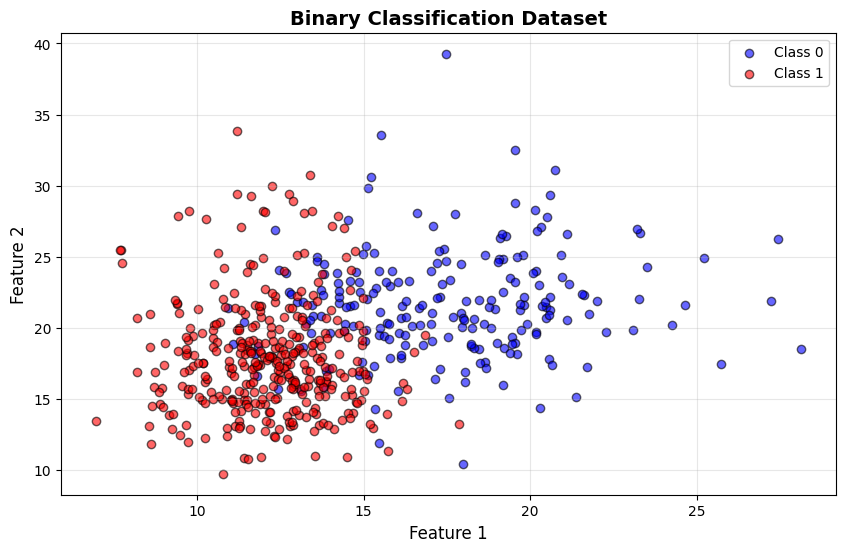

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generate synthetic binary classification dataset
'''X, y = make_classification(
    n_samples=1000,
    n_features=2,  # Using 2 features for easy visualization
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)'''

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

print(f"Dataset shape: {X.shape}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Class distribution: Class 0: {np.sum(y==0)}, Class 1: {np.sum(y==1)}")

# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], c='blue', label='Class 0', alpha=0.6, edgecolors='k')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c='red', label='Class 1', alpha=0.6, edgecolors='k')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Binary Classification Dataset', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



**Train - Test - Split**

In [214]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 398
Test set size: 171


In [215]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Logistic Regression**

‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’

In [216]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)

In [217]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [218]:
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,                 # 5-Fold Cross-Validation
    scoring='accuracy',   # Metric to optimize
    n_jobs=-1,            # Use all available CPU cores
    verbose=1
)

In [219]:
print("Starting Hyperparameter Tuning...")
grid_search.fit(X_train_scaled, y_train)

Starting Hyperparameter Tuning...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [220]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [221]:
print(f"\nBest Parameters found: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")


Best Parameters found: {'C': 0.1, 'penalty': 'l2'}
Best Cross-Validation Accuracy: 0.9774


In [222]:
y_pred = grid_search.predict(X_test_scaled)

In [223]:
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Test Set Accuracy: 0.9942

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        63
           1       0.99      1.00      1.00       108

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [224]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [225]:
classes = ['Class 0', 'Class 1']

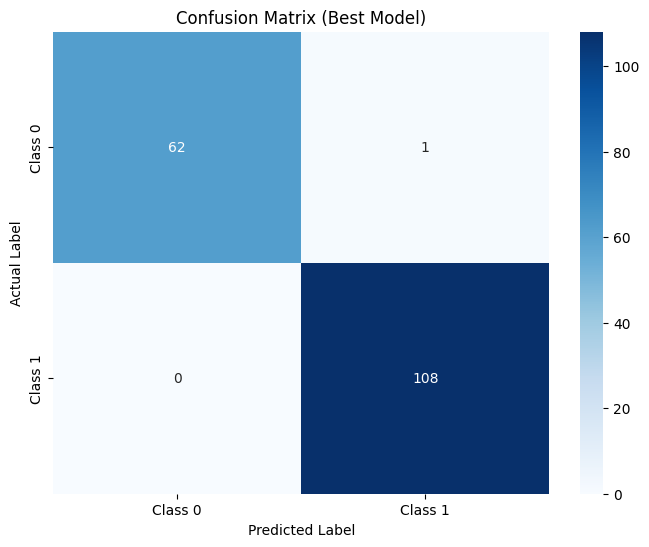

In [226]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes,
            yticklabels=classes)
plt.title('Confusion Matrix (Best Model)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**Decision Boundary**

In [227]:
#Define the Plotting Function
def plot_decision_boundary(X, y, model):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Generate a grid of points with distance h between them
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.figure(figsize=(10, 8))

    # Contour for probabilities
    plt.contourf(xx, yy, Z, levels=20, cmap='RdBu', alpha=0.8)
    plt.colorbar(label='Probability of Class 1')

    # Decision Boundary Line (where prob=0.5)
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

    # Plot the actual data points
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', label='Class 0', edgecolors='k', s=50)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', label='Class 1', edgecolors='k', s=50)

    plt.title('Logistic Regression Decision Boundary', fontsize=15)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

In [228]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)
df_viz = pd.DataFrame(data=X_test_pca, columns=['PC1', 'PC2'])

log_reg_pca_2d = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', random_state=42)
log_reg_pca_2d.fit(X_pca_2d, y)

#print("Logistic Regression model trained on 2D PCA data.")

LogisticRegression(C=0.1, random_state=42, solver='liblinear')

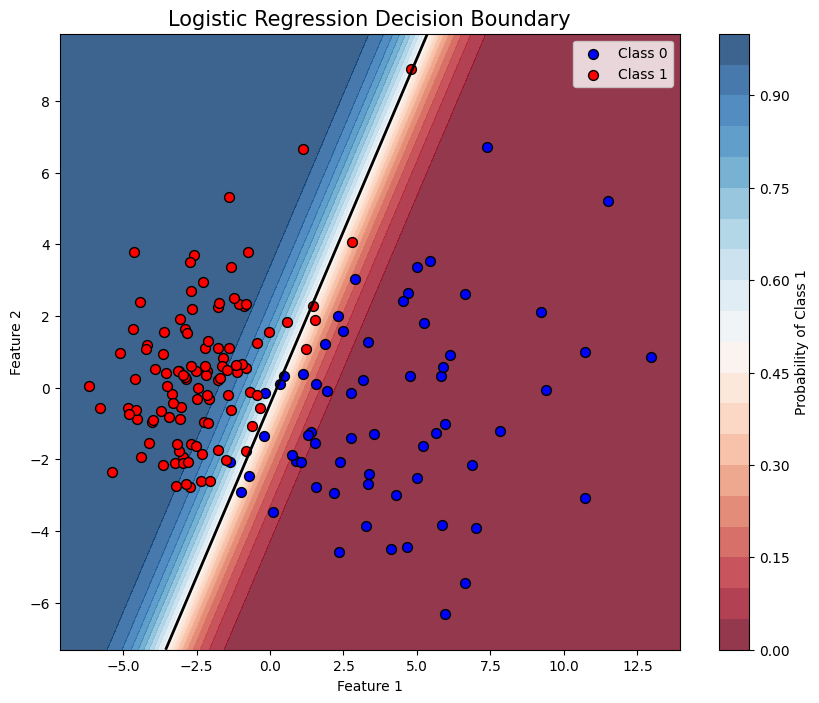

In [229]:
plot_decision_boundary(X_test_pca, y_test, log_reg_pca_2d)

In [230]:
log_reg_pca_2d = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', random_state=42)
log_reg_pca_2d.fit(X_pca_2d, y)

print("Logistic Regression model trained on 2D PCA data.")

Logistic Regression model trained on 2D PCA data.


In [231]:
scaler_full = StandardScaler()
X_scaled = scaler_full.fit_transform(X)

print(f"Shape of original X: {X.shape}")
print(f"Shape of scaled X_scaled: {X_scaled.shape}")
print(f"Mean of first feature in X_scaled: {np.mean(X_scaled[:, 0]):.4f}")
print(f"Standard deviation of first feature in X_scaled: {np.std(X_scaled[:, 0]):.4f}")

Shape of original X: (569, 30)
Shape of scaled X_scaled: (569, 30)
Mean of first feature in X_scaled: -0.0000
Standard deviation of first feature in X_scaled: 1.0000


In [232]:
from sklearn.decomposition import PCA
import pandas as pd

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

df_pca_2d = pd.DataFrame(data=X_pca_2d, columns=['PC1', 'PC2'])
df_pca_2d['target'] = y

print(f"Shape of 2D PCA transformed data: {X_pca_2d.shape}")
print(f"Explained variance ratio (2 components): {pca_2d.explained_variance_ratio_.sum():.4f}")

Shape of 2D PCA transformed data: (569, 2)
Explained variance ratio (2 components): 0.6324


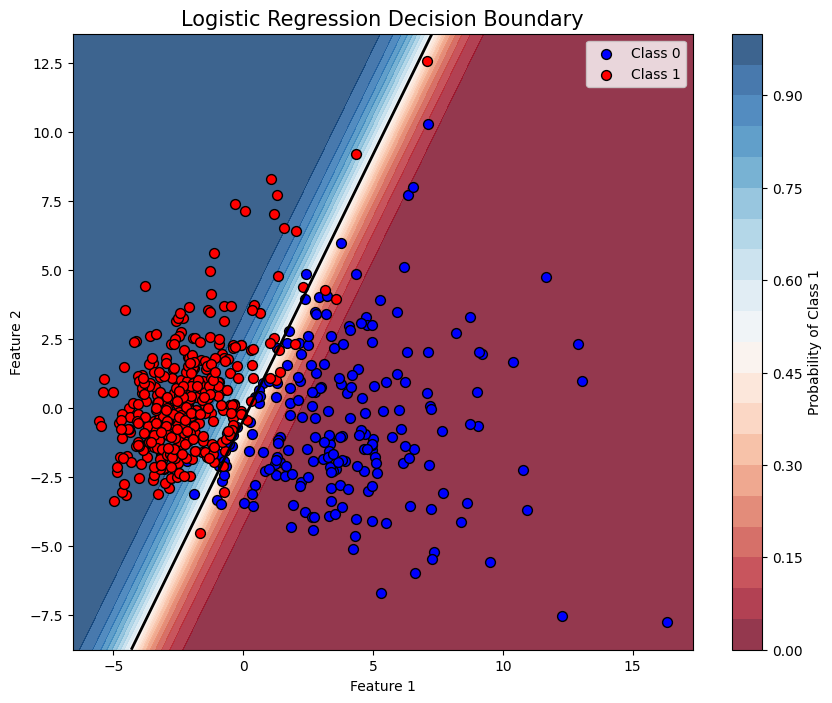

In [233]:
plot_decision_boundary(X_pca_2d, y, log_reg_pca_2d)

**ROC Curve**

<Figure size 800x600 with 0 Axes>

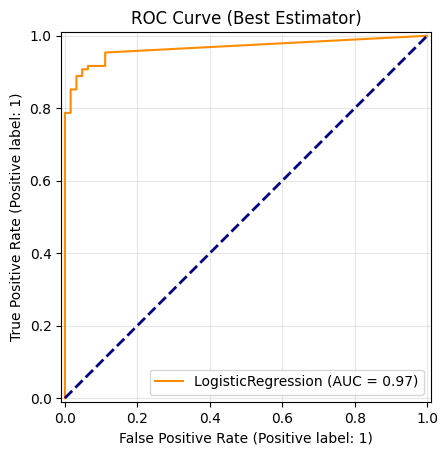

In [234]:
from sklearn.metrics import RocCurveDisplay

# Use the best model found by your Grid Search for your model
# Since we have not fitted the logistic regressor directly.
best_model = grid_search.best_estimator_

plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(best_model, X_test, y_test, color='darkorange')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve (Best Estimator)')
plt.grid(alpha=0.3)
plt.show()

**Precision-Recall Curve**

<Figure size 800x600 with 0 Axes>

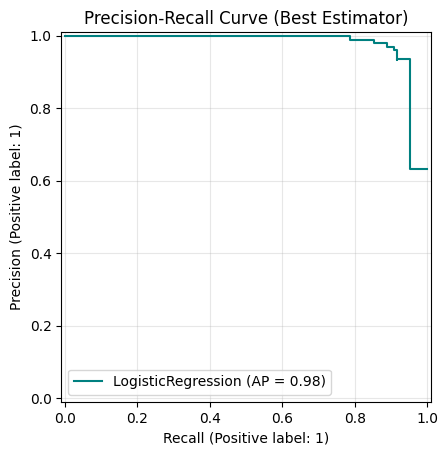

In [235]:
from sklearn.metrics import PrecisionRecallDisplay

plt.figure(figsize=(8, 6))
PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test, color='teal')

plt.title('Precision-Recall Curve (Best Estimator)')
plt.grid(alpha=0.3)
plt.show()

# Lab Task

<h3>1. Use the breast cancer dataset in scikit learn library and implement logistic regression over it.

<pre>
<font color="green">from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()</font>
</pre>
<h3>2. Visualize the data and perform exploratory data analysis (EDA).
<h3>3. Try to implement the same algo but with different solver for logistic regression.
<pre>‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’</pre>
<h3>4. Using PCA as a black box, can you reduce the dimension of your dataset to 2 or 3 for visualization purpose.
<pre>
<font color='green'>from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)
df_viz = pd.DataFrame(data=X_test_pca, columns=['PC1', 'PC2'])</font>
</pre>

In [236]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

df_pca_3d = pd.DataFrame(data=X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['target'] = y

print(f"Shape of 3D PCA transformed data: {X_pca_3d.shape}")
print(f"Explained variance ratio (3 components): {pca_3d.explained_variance_ratio_.sum():.4f}")

Shape of 3D PCA transformed data: (569, 3)
Explained variance ratio (3 components): 0.7264


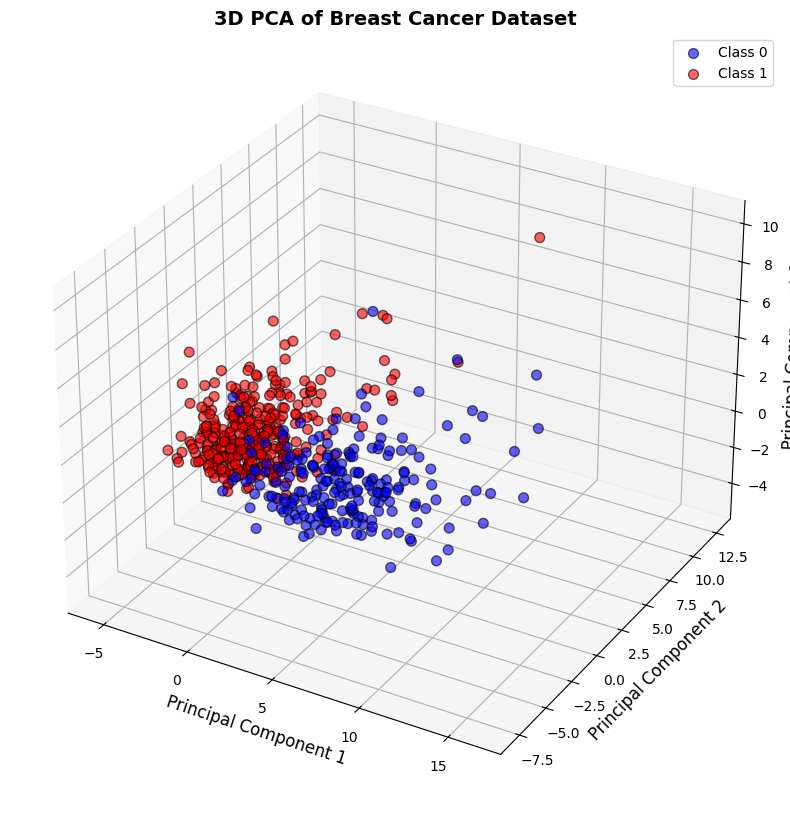

In [237]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for Class 0
ax.scatter(df_pca_3d[df_pca_3d['target'] == 0]['PC1'],
           df_pca_3d[df_pca_3d['target'] == 0]['PC2'],
           df_pca_3d[df_pca_3d['target'] == 0]['PC3'],
           c='blue', label='Class 0', s=50, alpha=0.6, edgecolors='k')

# Scatter plot for Class 1
ax.scatter(df_pca_3d[df_pca_3d['target'] == 1]['PC1'],
           df_pca_3d[df_pca_3d['target'] == 1]['PC2'],
           df_pca_3d[df_pca_3d['target'] == 1]['PC3'],
           c='red', label='Class 1', s=50, alpha=0.6, edgecolors='k')

ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
ax.set_title('3D PCA of Breast Cancer Dataset', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()


In [238]:
from sklearn.linear_model import LogisticRegression

log_reg_pca_3d = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', random_state=42)
log_reg_pca_3d.fit(X_pca_3d, y)

print("Logistic Regression model trained on 3D PCA data.")

Logistic Regression model trained on 3D PCA data.


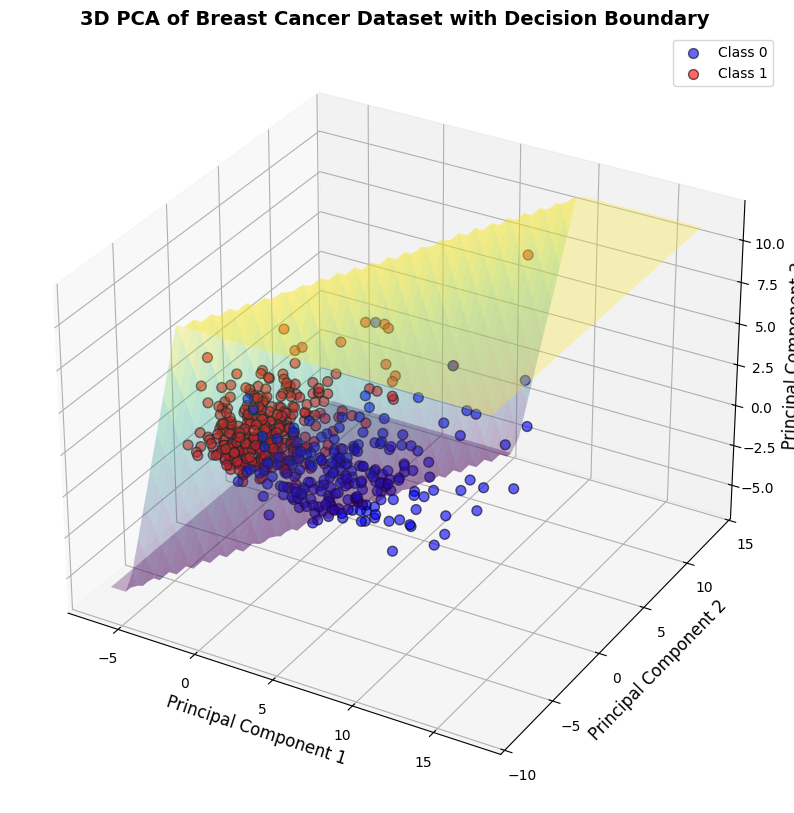

In [239]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for Class 0
ax.scatter(df_pca_3d[df_pca_3d['target'] == 0]['PC1'],
           df_pca_3d[df_pca_3d['target'] == 0]['PC2'],
           df_pca_3d[df_pca_3d['target'] == 0]['PC3'],
           c='blue', label='Class 0', s=50, alpha=0.6, edgecolors='k')

# Scatter plot for Class 1
ax.scatter(df_pca_3d[df_pca_3d['target'] == 1]['PC1'],
           df_pca_3d[df_pca_3d['target'] == 1]['PC2'],
           df_pca_3d[df_pca_3d['target'] == 1]['PC3'],
           c='red', label='Class 1', s=50, alpha=0.6, edgecolors='k')

# Get the coefficients and intercept from the 3D PCA trained logistic regression model
coef = log_reg_pca_3d.coef_[0]
intercept = log_reg_pca_3d.intercept_[0]

# Create a meshgrid for PC1 and PC2
pc1_min, pc1_max = X_pca_3d[:, 0].min() - 1, X_pca_3d[:, 0].max() + 1
pc2_min, pc2_max = X_pca_3d[:, 1].min() - 1, X_pca_3d[:, 1].max() + 1
pc3_min, pc3_max = X_pca_3d[:, 2].min() - 1, X_pca_3d[:, 2].max() + 1

xx, yy = np.meshgrid(np.linspace(pc1_min, pc1_max, 50),
                     np.linspace(pc2_min, pc2_max, 50))

# Calculate the decision boundary for PC3. The decision boundary for logistic regression
# is defined by w1*PC1 + w2*PC2 + w3*PC3 + b = 0, where w1, w2, w3 are coefficients
# and b is the intercept. We solve for PC3:
# PC3 = (-w1*PC1 - w2*PC2 - b) / w3
# We need to handle the case where w3 (coef[2]) might be close to zero to avoid division by zero.
if np.isclose(coef[2], 0):
    print("Warning: Coefficient for PC3 is zero or very close to zero. Cannot plot decision surface in this manner.")
    # In this case, the decision boundary would be a plane parallel to the PC3 axis.
    # For simplicity, we can skip plotting the surface or handle it differently if needed.
    pass # We will still show the scatter plot
else:
    zz = (-coef[0] * xx - coef[1] * yy - intercept) / coef[2]

    # Clip zz values to be within the range of PC3 for better visualization
    zz = np.clip(zz, pc3_min, pc3_max)

    # Plot the decision surface
    ax.plot_surface(xx, yy, zz, alpha=0.3, cmap='viridis')

ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
ax.set_title('3D PCA of Breast Cancer Dataset with Decision Boundary', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

## ROC Curve for 3-Component PCA Model

<Figure size 800x600 with 0 Axes>

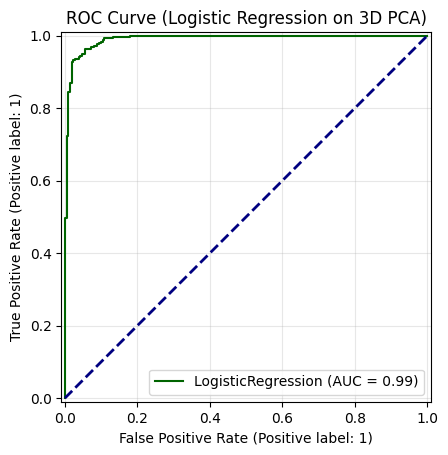

In [240]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(log_reg_pca_3d, X_pca_3d, y, color='darkgreen')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve (Logistic Regression on 3D PCA)')
plt.grid(alpha=0.3)
plt.show()

## Precision-Recall Curve for 3-Component PCA Model

<Figure size 800x600 with 0 Axes>

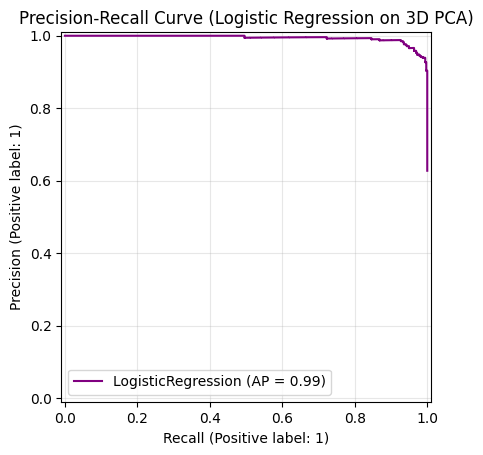

In [241]:
from sklearn.metrics import PrecisionRecallDisplay

plt.figure(figsize=(8, 6))
PrecisionRecallDisplay.from_estimator(log_reg_pca_3d, X_pca_3d, y, color='purple')

plt.title('Precision-Recall Curve (Logistic Regression on 3D PCA)')
plt.grid(alpha=0.3)
plt.show()